In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [2]:
workload_data = pd.read_csv(index_col=0, filepath_or_buffer='data.csv')
labeled_data = pd.read_csv(index_col=0, filepath_or_buffer='labels.csv')

267


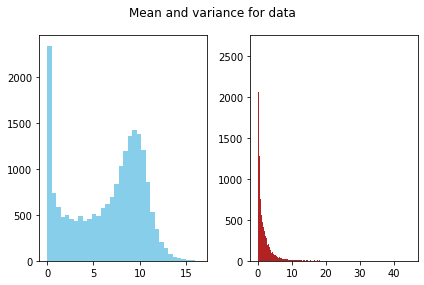

In [34]:
data_var = workload_data.var()
data_mean = workload_data.mean()
zero_var_indices = []
for i, var in enumerate(data_var):
    if var == 0:
        zero_var_indices.append(i)

# print(zero_var_indices)
print(len(zero_var_indices))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for data')
ax1.hist(data_mean, color='skyblue', label='means', bins='auto')
ax2.hist(data_var, color='firebrick', label='variances', bins='auto')
plt.tight_layout()
plt.show()

In [60]:
# variance filtering
var_lim = 2.2
ind = []
for i, var in enumerate(data_var):
    if var > var_lim:
        ind.append(i)

trimmed_data = workload_data.iloc[:, ind]
print(len(workload_data.T))
print(len(trimmed_data.T))


20531
5074


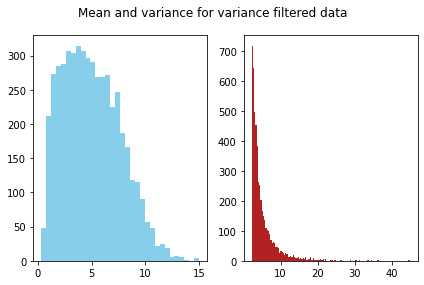

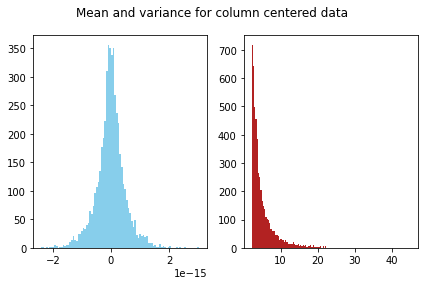

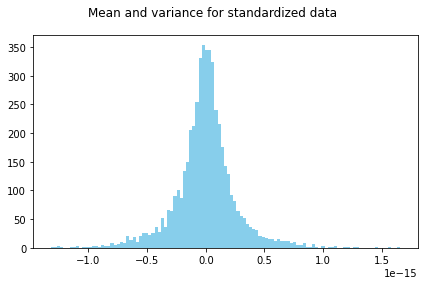

mean of column centered data: -0.00
mean of standardized data: -0.00
std of standardized data: 1.00


In [80]:
data_var = trimmed_data.var()
data_mean = trimmed_data.mean()
zero_var_indices = []
for i, var in enumerate(data_var):
    if var == 0:
        zero_var_indices.append(i)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for variance filtered data')
ax1.hist(data_mean, color='skyblue', label='means', bins='auto')
ax2.hist(data_var, color='firebrick', label='variances', bins='auto')
plt.tight_layout()
plt.show()

# From here on out we are using trimmed data as main data
col_centered = trimmed_data - trimmed_data.mean()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for column centered data')
ax1.hist(col_centered.mean(), color='skyblue', label='means', bins='auto')
ax2.hist(col_centered.var(), color='firebrick', label='variances', bins='auto')
plt.tight_layout()
plt.show()

standardized = col_centered/col_centered.std()
fig, (ax1) = plt.subplots(1)
fig.suptitle('Mean and variance for standardized data')
ax1.hist(standardized.mean(), color='skyblue', label='means', bins='auto')
plt.tight_layout()
plt.show()


standardized = col_centered/col_centered.std()
print(f'mean of column centered data: {col_centered.mean().mean():.2f}')
print(f'mean of standardized data: {standardized.mean().mean():.2f}')
print(f'std of standardized data: {standardized.std().mean():.2f}')

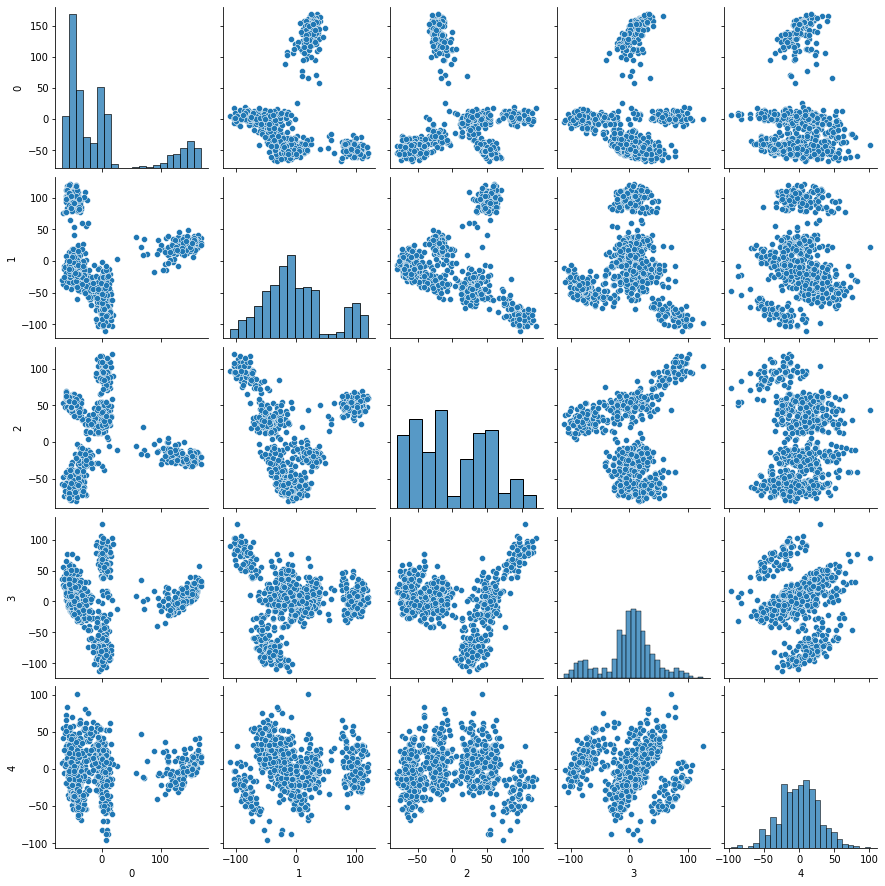

In [108]:
# principal component analysis
n_pc = 5
pca = PCA(n_components=n_pc)
principalComponents = pca.fit_transform(col_centered)
principalComponents_df = pd.DataFrame(principalComponents)

sns.pairplot(principalComponents_df)
# print(principalComponents_df)



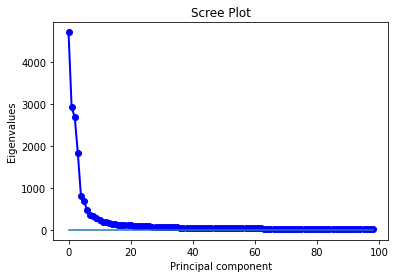

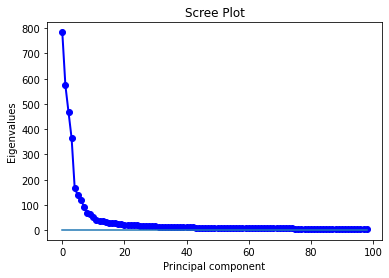

In [141]:

n_pc = 100
pca = PCA(n_components=n_pc)
pca.fit_transform(col_centered)
lambdas = pca.explained_variance_
# print(pca.explained_variance_)
a = 0
b = -1
lamb_trimmed = lambdas[a:b]

plt.plot(range(a,len(lamb_trimmed)+a), lamb_trimmed, 'o-', linewidth=2, color='blue')
plt.plot(range(a,len(lamb_trimmed)+a), np.ones(len(lamb_trimmed)))
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.show()


pca.fit_transform(standardized)
lambdas = pca.explained_variance_
# print(pca.explained_variance_)
a = 0
b = -1
lamb_trimmed = lambdas[a:b]

plt.plot(range(a,len(lamb_trimmed)+a), lamb_trimmed, 'o-', linewidth=2, color='blue')
plt.plot(range(a,len(lamb_trimmed)+a), np.ones(len(lamb_trimmed)))
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.show()


In [ ]:
# time for clustering
